# The Sparks Foundation:
# Data Science & Business Analytics Intern - May'21

## Name: Anupriya Dongare

# Task-1 : Prediction using Supervised ML 

- Predict the percentage of a student based on the no. of study hours.This is a simple linear regression task as it involves just two variables.
Also, predict the percentage of the student if he/she studies for 9.25 hours/day.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
# Reading data from remote link

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Dataset imported successfully")

Dataset imported successfully


In [3]:
# Reading 1st five students hours and scores from dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Reading last five students hours and scores from dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Get the dimensions of dataset array
df.shape

(25, 2)

In [6]:
# Statistical description of dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#To check null values in dataset

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# To check if duplicates values are there or not

df.duplicated().sum()

0

In [9]:
# To get a brief description of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visualizing the dataset

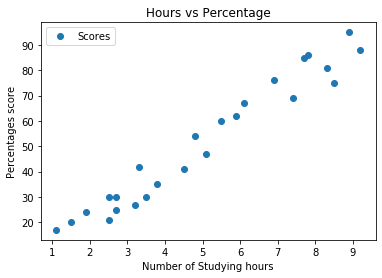

In [10]:
# Plotting the dataset

df.plot(x='Hours', y='Scores', style= "o")
plt.rcParams["figure.figsize"]=[8, 3]
plt.title('Hours vs Percentage')
plt.xlabel('Number of Studying hours')
plt.ylabel('Percentages score')
plt.show()

From the graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score by the student.

In [11]:
#corr() can also be used to find pairwise correlation of all columns in dataset
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


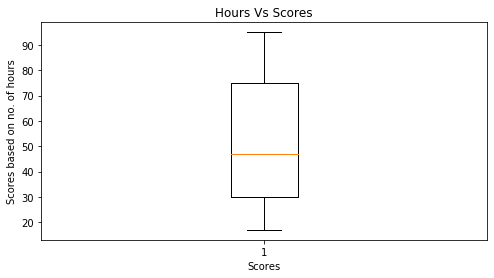

In [12]:
# BOX PLOT

plt.rcParams["figure.figsize"]=[8, 4]
data_scores = df['Scores']
plt.boxplot(data_scores)
plt.title('Hours Vs Scores')
plt.xlabel('Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

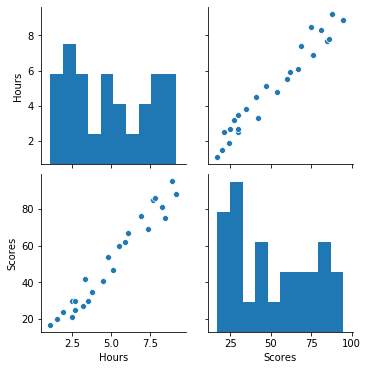

In [13]:
sns.pairplot(df, diag_kind="hist")

## Preparing the data

- The attributes are stored in the x variable. We specified "-1" as the range for columns since we wanted our attribute set to contain all the columns except the last one, which is "Scores". Similarly the y variable contains the labels. We specified 1 for the label column since the index for "Scores" column is 1. Remember, the column indexes start with 0, with 1 being the second column. In the next section, we will see a better way to specify columns for attributes and labels.

In [14]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

###  Splitting the data

 - Now that we have our attributes and labels, the next step is to split this data into training and test data sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

- The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

In [16]:
len(x_train)

20

In [17]:
len(x_test)

5

## Training the Model

The values taken from training dataset are trained using linear regression model algorithm

In [18]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Training complete")

Training complete


## Visualizing the Model

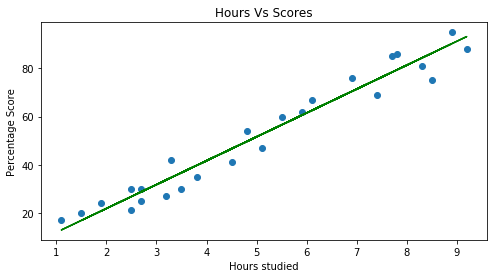

Slope of the regression line is : [9.91065648]
Intercept of the regression line is : 2.018160041434683


In [19]:
#Plotting the regression line
line = regressor.coef_*x + regressor.intercept_

# Plotting the test data
plt.scatter(x, y)
plt.title("Hours Vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.plot (x, line, color='green')
plt.show()

print("Slope of the regression line is :" , regressor.coef_)
print("Intercept of the regression line is :", regressor.intercept_)

- This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or we can say, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

## Making Suitable Predictions With The Data

In [20]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
y_pred = regressor.predict(x_test)
print (y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [22]:
# Comparing actual and predicted values of test dataset
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


- Though our model is not very much precise, the predicted percentages are close to the actual ones which can be visualized by the below plotted bar graph more clearly.

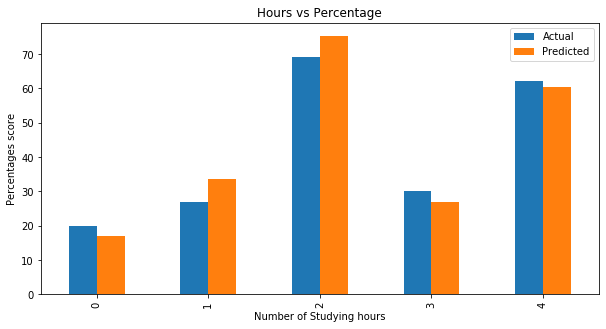

In [23]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df1.plot(kind='bar',figsize=(10,5))
plt.title('Hours vs Percentage')
plt.xlabel('Number of Studying hours')
plt.ylabel('Percentages score')
#plt.grid(which='major', linewidth='0.5', color='red')
#plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

## Predicting the percentage of the student if he/she studies for 9.25 hours/day.

In [24]:
hours = 9.25
prediction = regressor.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

# print("Predicted %age score if student studies for", hours,"hours is :", prediction[0])

No of study Hours = 9.25
Predicted Score = 93.69173248737538


- If student studies for 9.25 hrs/day then he/she will score around 94%

## Evaluating the Model

- Done for comparing how well different algorithms perform on a particular dataset. Here, I have evaluated the model by using mean absolute error, mean squared error and root mean squared error.

In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


- You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm is suitable.

### Thank You!!!